# Introduction 

Le but de ce projet est de collecter a partir de plusieur sources des informations sur les archives des tweets l’utilisateur de Twitter @dog_rates, également connu sous le nom de WeRateDogs.
nous commencerons donc par collecter les donees ensuite nous procederons a l'evaluation pour determiner tout les probleme de des donees qu'ils soient d'ordre ou de qualite avant de proceder a leur netoyage pour sortir un dataframe propre afin de produire des visualisations.

In [1]:
#Importation des package neccessaire pour l'analyse

import pandas as pd
import numpy as np 
import os 
import datetime as dt
import requests as rt
import json 
import tweepy 
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Collecte de la donnee(a partir de 3 sources)

## 1.1. donnees archives telecharges manuelement 

In [2]:
#chargement des de la donnee telecharge manuelement
df_telecharge = pd.read_csv('twitter_archive_enhanced.csv')


## 1.2. donnees a telecharger avec le module Requests

In [3]:
#Telechargement de image_prediction avec le module Requests

#creation de dossier dossier pour sauvergarder le fichier
dosier_prediction = 'prediction_image'
if not os.path.exists(dosier_prediction):
    os.makedirs(dosier_prediction)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = rt.get(url)

In [4]:
#lecture du fichier a partir du lien  
with open(os.path.join(dosier_prediction,
                      url.split('/')[-1]) , mode='wb') as file:
    #Lecture du contenu
    file.write(response.content)

In [5]:
#Charg,ent du dataframe image_prediction
image_predictions_df = pd.read_csv('prediction_image/image-predictions.tsv' , sep = "\t")

## 1.3. Donnees Additonelles avec l'API de twiter

### - code  pour l'autentification avec l'API

In [6]:
"""
consumerKey = '############################'
consumerSecret = '############################'
accessToken = '############################'
accessTokenSecret = '############################'

# Créer l'objet d'authentification
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Parametrer le access token et le access token secret
auth.set_access_token(accessToken, accessTokenSecret)

# Créer l'objet API en transmettant les informations d'authentification
api = tweepy.API(auth, wait_on_rate_limit= True)

## Interrogation de l'api
count = 0
dic_echoue = {}

# Sauvegarder chaque Json comme une ligne dans le fichier fichier .txt 
with open('tweet_json.txt', 'w') as fichier_de_sortie:

    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, fichier_de_sortie)
            fichier_de_sortie.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            dic_echoue[tweet_id] = e
            pass
print(dic_echoue)
"""

'\nconsumerKey = \'############################\'\nconsumerSecret = \'############################\'\naccessToken = \'############################\'\naccessTokenSecret = \'############################\'\n\n# Créer l\'objet d\'authentification\nauth = tweepy.OAuthHandler(consumerKey, consumerSecret)\n\n# Parametrer le access token et le access token secret\nauth.set_access_token(accessToken, accessTokenSecret)\n\n# Créer l\'objet API en transmettant les informations d\'authentification\napi = tweepy.API(auth, wait_on_rate_limit= True)\n\n## Interrogation de l\'api\ncount = 0\ndic_echoue = {}\n\n# Sauvegarder chaque Json comme une ligne dans le fichier fichier .txt \nwith open(\'tweet_json.txt\', \'w\') as fichier_de_sortie:\n\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, fichier_de_s

In [7]:
#lecture du fichier tweet_Json 
df_list = []

with open('tweet_json.txt') as fichier:
    for line in fichier:
        df_list.append(json.loads(line))

In [8]:
#conversion en dataframe et suppression des collones non neccessaire pour l'analyse 
tweet_json_df = pd.DataFrame(df_list , columns = ['id' ,  'retweet_count'  ,'favorite_count','full_text']) 

In [9]:
tweet_json_df

,id,retweet_count,favorite_count,full_text
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...
...,...,...,...,...
2349,666049248165822465,41,111,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,147,311,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,47,128,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,48,132,This is a western brown Mitsubishi terrier. Up...


# 2. Évaluation des données

### 2.1 Donnees telecharges manuelement 

In [10]:
#Visualisation des 5 premiere lignes de la donnee telecharge
df_telecharge.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# shape du dataframe
df_telecharge.shape

(2356, 17)

In [12]:
#Voyons les differentes variables du dataframe
df_telecharge.columns.to_list()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [13]:
#Visualisation des lignes au hasard dans le dataset
df_telecharge.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1559,688547210804498433,NaN,NaN,2016-01-17 02:23:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,None,None,None,None
1593,686386521809772549,NaN,NaN,2016-01-11 03:17:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Crimson. He's a Speckled Winnebag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686386521...,11,10,Crimson,None,None,None,None
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",His name is Charley and he already has a new s...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1806,676936541936185344,NaN,NaN,2015-12-16 01:27:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a rare pouched pupper. Ample stora...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
309,835536468978302976,NaN,NaN,2017-02-25 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lola. Her hobbies include ...,8.352641e+17,4.196984e+09,2017-02-24 23:04:14 +0000,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None


In [14]:
#Voyons voir les types des donees avec la fonction info de pandas
df_telecharge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
## Statistiques descriptives
df_telecharge.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# Visualisation des valeurs manquantes 
df_telecharge.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
# visualisation des occurences de chaque nom 
df_telecharge.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
# les diifferentes valeurs que comporte la variable rating_denominator
df_telecharge.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [19]:
# les diifferentes valeurs que comporte la variable rating_denominator
df_telecharge.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [20]:
df_telecharge.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
# Visualisation de valeurs dupliquees
df_telecharge.duplicated().sum()

0

### 2.2 Donees scraper avec le module requests

In [22]:
#Nous repetons les memes choses pour les donnes de prediction
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
#shape
image_predictions_df.shape

(2075, 12)

In [24]:
# Les collones de la data
list(image_predictions_df.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [25]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [28]:
image_predictions_df.duplicated().sum()

0

In [29]:
image_predictions_df.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [30]:
type(image_predictions_df.img_num[0])

numpy.int64

### 2.3 donnees collectes avec L'API de tweeter

In [31]:
tweet_json_df.head(5)

,id,retweet_count,favorite_count,full_text
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...


In [32]:
tweet_json_df.shape

(2354, 4)

In [33]:
tweet_json_df.sample(5)

,id,retweet_count,favorite_count,full_text
2090,670782429121134593,863,1691,This dude slaps your girl's ass what do you do...
2226,668256321989451776,667,1385,This is Jareld. Jareld rules these waters. Lad...
1828,676219687039057920,31989,67100,This is Kenneth. He's stuck in a bubble. 10/10...
2272,667455448082227200,66,203,This is Reese and Twips. Reese protects Twips....
921,755955933503782912,3285,8092,Here's a frustrated pupper attempting to escap...


In [34]:
list(tweet_json_df.columns)

['id', 'retweet_count', 'favorite_count', 'full_text']

In [35]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   full_text       2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [36]:
tweet_json_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [37]:
tweet_json_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
full_text         0
dtype: int64

In [38]:
tweet_json_df.retweet_count.dtype

dtype('int64')

In [39]:
tweet_json_df.favorite_count.dtype

dtype('int64')

In [40]:
tweet_json_df.duplicated().sum()

0

## - Problemes de Qualite detecte


### L'ensemble des trois donees
1. **les colonnes tweet_id et id represente la meme chose mais des noms differents/ pareil pour les colonnes text et full_text"**


2. **des Valeurs manquantes dans la colonne expanded_urlset et name ** 

3. **La colonne name comporte des valeurs 'a' comme nom de personnes,ce qui est assez etrange**



4. **Probleme de type de donees au niveau des colonnes timestamp,tweet_id,retweet_count,favorite_count**

5. ** Certains tweets sont des re-tweets/réponses qui ne sont pas nécessaires pour l'analyse car ce ne sont pas des tweets 
   originaux**


6. **Certaines collonnes sont pas utiles pour l'analyse ** 


7. **Il existe des lignes  pour lequels le dénominateur d'évaluation est soit 0 ou est inferieur 10 , ce qui n'est pas valide au reagard de la norme**.


8. **certianes  valeurs du numérateur des notes sont tres largemnt  supérieures à 10 et d'autres sont eagle a 0 . comme 1776 on peut se limiter a 15 comme la plus forte note et considerer toute valeur superieur comme des outliers**



9. **La balise html unitile dans la colonne Source: recuperer la vrai source et suprimer les balices** 


10. **des collonnes p1,p1_config,p1_dog,p2,p2_config,p2_dog ne sont pas assez explicite pour la comprehension et devrait etre modiffie**




## - Problemes d'orde detecte


### tous les data frame

- 11.**les collonnes  floofer,doggo,puppo et pupper peuvent doivent etre regroupees en une seule pour representer l'etat du chien**

 - 12. **Les trois tables de données font partie d'un unique jeu de données et doivent être fusionnées.**
 

# NB: les numeros affectes aux problemes ici ne sont pas l'ordre suivi pour l'analyse car certains problemes d'ordre qui sont citer en derniere position sont selon moi neccessaire d'etre resolu avant de poursuivre le netoyage

# Netoyage des donees 

In [41]:
#copie de la donee n 1
Clean_df_telecharge = df_telecharge.copy()

In [42]:
#copie de la donee n 2
Clean_image_predictions_df = image_predictions_df.copy()

In [43]:
#copie de la donee n 3
Clean_tweet_json_df = tweet_json_df.copy()

### Probleme 1: 
**les colonnes tweet_id et id represente la meme chose mais des noms differents/ pareil pour les colonnes text et full_text"**


### Definir :
renommer id en tweed id et text en full_text pour faciliter la combinaison des donees


### Code:

In [44]:
#renommons les collones id et text dans les dataframe Clean_tweet_json_df et Clean_df_telecharge et combinaison des 3 dataframe
Clean_tweet_json_df.rename(columns={'id': 'tweet_id'}, inplace=True)
Clean_df_telecharge.rename(columns={'text': 'full_text'}, inplace=True)

### Probleme 2 :
    Les trois tables de données font partie d'un unique jeu de données et doivent être fusionnées.


### Definir :
fusionner les trois tables pour le netoyage

### Code :

In [45]:
#comnbinaisons des 3 dataframes
clean_twitter_archive = pd.merge(Clean_df_telecharge , Clean_image_predictions_df , on="tweet_id"  , how="left") 
clean_twitter_archive = pd.merge(clean_twitter_archive , Clean_tweet_json_df , on= ["tweet_id","full_text"] , how="left")

In [46]:
#Sauvergarde des donnees combines
clean_twitter_archive.to_csv('twitter_archive_clean.csv',index=False, encoding='utf-8')


In [47]:
#Netoyage des donees combinees
clean_twitter_archive.shape

(2356, 30)

In [48]:
clean_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,full_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


In [49]:
clean_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,full_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1849,675781562965868544,NaN,NaN,2015-12-12 20:57:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Buddah. He was Waldo for Hallowee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675781562...,...,0.921968,True,West_Highland_white_terrier,0.017811,True,toy_poodle,0.013555,True,537.0,1750.0
1602,685973236358713344,NaN,NaN,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685973236...,...,0.450678,True,Eskimo_dog,0.430275,True,malamute,0.118590,True,611.0,2326.0
1369,702332542343577600,NaN,NaN,2016-02-24 03:21:41 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rudy. He's going to be a star. 13/10 t...,NaN,NaN,NaN,https://vine.co/v/irlDujgwOjd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1755.0,3491.0
167,859851578198683649,NaN,NaN,2017-05-03 19:26:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper. He picks pup recyclables that ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859851578...,...,0.899086,True,golden_retriever,0.047091,True,kuvasz,0.023206,True,3780.0,16105.0
813,771102124360998913,NaN,NaN,2016-08-31 21:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He works for @TODAYshow. Supe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771102124...,...,0.568789,True,pug,0.179918,True,Staffordshire_bullterrier,0.034437,True,1663.0,6898.0


In [50]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   full_text                   2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [51]:
clean_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [52]:
clean_twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
full_text                        0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog                         281
retweet_count       

In [53]:
clean_twitter_archive.columns.to_list()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'full_text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

In [54]:
clean_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2354.000000,2354.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,3164.797366,8080.968564
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,5284.770364,11814.771334
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,624.500000,1415.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,1473.500000,3603.500000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,3652.000000,10122.250000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


### Probleme 3 :
des Valeurs manquantes dans la colonne expanded_urlset et name  

### Definir :
effacer les lignes avec des valeurs manquantes  dans les deux collonnes

### Code :

In [55]:
# Remplacement des valeurs None par NaN avec numpy pour pouvoir les suprimer
clean_twitter_archive.name.replace('None',np.NaN,inplace=True)

# suppression de tout les enregistrement avec des valeur null
clean_twitter_archive.name.dropna(inplace=True)
clean_twitter_archive.name.fillna(method='ffill',inplace=True)


clean_twitter_archive.expanded_urls.dropna(inplace=True)



In [56]:
clean_twitter_archive.name.isnull().value_counts()

False    2356
Name: name, dtype: int64

In [57]:
clean_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Tester :

In [58]:
clean_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
full_text                        0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog                         281
retweet_count       

### probleme 4:

**La colonne name comporte des valeurs 'a' comme nom de personnes,ce qui est assez etrange**

### definir :
Modifier le nom "a" par un nom imaginaire coherent ex: ashley

### Code :

In [59]:
clean_twitter_archive['name'] = clean_twitter_archive['name'].replace('a','ashley')



### Tester :

In [60]:
clean_twitter_archive[clean_twitter_archive.name=='ashley'  ]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,full_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,16570.0,50199.0
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,...,0.226716,False,lighter,0.081941,False,switch,0.039009,False,4715.0,16063.0
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,...,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True,1968.0,7192.0
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,...,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True,1116.0,3243.0
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,...,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True,1316.0,5346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41.0,111.0
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147.0,311.0
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47.0,128.0
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48.0,132.0


### probleme 5:
 **Probleme de type de donees au niveau des colonnes timestamp,tweet_id,retweet_count,favorite_count**


### definir :
Changer les types des collones 

### Code :

In [61]:
##pour contouner certains probleme nous remplacons les valeurs none par zero 
clean_twitter_archive['retweet_count'] = clean_twitter_archive['retweet_count'].fillna(0)

clean_twitter_archive['favorite_count'] = clean_twitter_archive['favorite_count'].fillna(0)



In [62]:
# Changer le type de tweet_id
clean_twitter_archive['tweet_id'] = clean_twitter_archive['tweet_id'].astype('str')


#changer le type de timestamp
clean_twitter_archive['timestamp'] = clean_twitter_archive['timestamp'].astype('datetime64')


#changer le type de retweet_count
clean_twitter_archive['retweet_count'] = clean_twitter_archive['retweet_count'].astype('int64')

#changer le type de favorite_count
clean_twitter_archive['favorite_count'] = clean_twitter_archive['favorite_count'].astype('int64')



### Tester :

In [63]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   full_text                   2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Probleme 6: 
Certains tweets sont des re-tweets/réponses qui ne sont pas nécessaires pour l'analyse car ce ne sont pas des tweets originaux 


### Definir : 
Effacer les tweets qui sont pas originaux pour ne laisser que les vrai tweets pour l'analyse

### Code :

In [64]:
# suppression des retweets  
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isnull()]

# suppression des retweets srépones aux tweets
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.in_reply_to_status_id.isnull()]

### Tester

In [65]:
clean_twitter_archive.in_reply_to_status_id.notnull().sum() 

0

### Probleme 7 : 
** certaines collonnes ne sont pas neccessaire pour l'analyse  pour notre annalyse** 


### Definir :
Supprimer toutes les collones non neccessaires  

### Code :

In [66]:
 clean_twitter_archive.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp','in_reply_to_user_id','in_reply_to_status_id'],axis=1,inplace=True)

### Tester :

In [67]:
clean_twitter_archive.columns.to_list()

['tweet_id',
 'timestamp',
 'source',
 'full_text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

### Probleme 8.
Il existe des lignes  pour lequels le dénominateur d'évaluation est soit 0 ou est inferieur 10 , ce qui n'est pas valide au reagard de la norme .


### Definir : 
Remplacer les denominateurs autres que 10 par 10

### Code :

In [68]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.rating_denominator == 10]


### Tester

In [69]:
clean_twitter_archive.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Probleme 9:
certianes  valeurs du numérateur des notes sont tres largemnt  supérieures à 10 comme   1776. on peut se limiter a 15 comme la plus forte note et considerer toute valeur superieur comme des outliers


### Definir : 
Remplacer les note au numerateur plus grand que 15 par 15 et aussi celle qui sont egale a 0 par 1

### Code :

In [70]:

clean_twitter_archive['rating_numerator'].mask(clean_twitter_archive['rating_numerator'] > 15, 15, inplace=True)

clean_twitter_archive['rating_numerator'].mask(clean_twitter_archive['rating_numerator'] == 0, 1, inplace=True)



In [71]:
clean_twitter_archive.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       5
15      5
Name: rating_numerator, dtype: int64

### Tester :

In [72]:
clean_twitter_archive[clean_twitter_archive['rating_numerator'] > 15]


,tweet_id,timestamp,source,full_text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [73]:
clean_twitter_archive[clean_twitter_archive['rating_numerator'] == 0]


,tweet_id,timestamp,source,full_text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Probleme 10 

### Definir :
La balise html unitile dans la colonne Source: recuperer la vrai source et suprimer les balises 

### Code :

In [74]:
clean_twitter_archive['source'] = clean_twitter_archive['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


C:\Users\Stephane\AppData\Local\Temp\ipykernel_8156\3589886872.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_twitter_archive['source'] = clean_twitter_archive['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


### Tester :

In [75]:
clean_twitter_archive.source.value_counts()

Twitter for iPhone     1947
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Probleme  11:
des collonnes p1,p1_config,p1_dog,p2,p2_config,p2_dog ne sont pas assez explicite pour la comprehension et devrait etre modiffie

### Definir : 
Renommer les collonnes pour les rendre plus comprehensible

In [76]:
### Code :
def remame_colomns(df,colonne_name, new_col_name):
    return df.rename(columns={colonne_name: new_col_name}, inplace=True)

### code :

In [77]:
#p1
remame_colomns(clean_twitter_archive,'p1','prediction_1')
remame_colomns(clean_twitter_archive,'p1_conf','prediction_1_config')
remame_colomns(clean_twitter_archive,'p1_dog','prediction_1_dog')
#p2
remame_colomns(clean_twitter_archive,'p2','prediction_2')
remame_colomns(clean_twitter_archive,'p2_conf','prediction_2_config')
remame_colomns(clean_twitter_archive,'p2_dog','prediction_2_dog')
#p3
remame_colomns(clean_twitter_archive,'p3','prediction_3')
remame_colomns(clean_twitter_archive,'p3_conf','prediction_3_config')
remame_colomns(clean_twitter_archive,'p3_dog','prediction_3_dog')



In [78]:
list(clean_twitter_archive.columns)

['tweet_id',
 'timestamp',
 'source',
 'full_text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'prediction_1',
 'prediction_1_config',
 'prediction_1_dog',
 'prediction_2',
 'prediction_2_config',
 'prediction_2_dog',
 'prediction_3',
 'prediction_3_config',
 'prediction_3_dog',
 'retweet_count',
 'favorite_count']

### probleme 12: 
les collones doggo,floofer,pupper,puppo doivent etre regroupe en une seul collone puuique certaines valeur se retrouve a la fois comme nom de collone et comme valeurs d'une colone.

### Definir: 
combiner ces collones en une seule "dog_level" pour represente l'etat du chien et supprimons les 

### Code :

In [79]:
clean_twitter_archive['dog_level'] = clean_twitter_archive['full_text'].str.extract('(doggo|floofer|pupper|puppo)')
#suppression des collonnes combines
clean_twitter_archive = clean_twitter_archive.drop(columns=['doggo','floofer','pupper','puppo'])
#Remplissement des valeurs nulles de la colonne de dog_level
clean_twitter_archive['dog_level'].fillna(method ='ffill' ,inplace= True)


### Tester :

In [80]:
clean_twitter_archive['dog_level'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Tester :

In [81]:
#verification des valeurs encore manquantes
clean_twitter_archive.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
full_text                0
expanded_urls            3
rating_numerator         0
rating_denominator       0
name                     0
jpg_url                126
img_num                126
prediction_1           126
prediction_1_config    126
prediction_1_dog       126
prediction_2           126
prediction_2_config    126
prediction_2_dog       126
prediction_3           126
prediction_3_config    126
prediction_3_dog       126
retweet_count            0
favorite_count           0
dog_level                9
dtype: int64

In [82]:
# supresssions des lignes avec des valeurs manquantes
clean_twitter_archive.dropna(inplace=True)


In [83]:
# Reverification 
clean_twitter_archive.isnull().sum()

tweet_id               0
timestamp              0
source                 0
full_text              0
expanded_urls          0
rating_numerator       0
rating_denominator     0
name                   0
jpg_url                0
img_num                0
prediction_1           0
prediction_1_config    0
prediction_1_dog       0
prediction_2           0
prediction_2_config    0
prediction_2_dog       0
prediction_3           0
prediction_3_config    0
prediction_3_dog       0
retweet_count          0
favorite_count         0
dog_level              0
dtype: int64

In [84]:
#Verification des valeurs dupliquees
clean_twitter_archive.duplicated().sum()

0

In [85]:
# Le shape final
clean_twitter_archive.shape

(1945, 22)

### Sauvegarde de la donnee traite

In [86]:
clean_twitter_archive.to_csv('twitter_archive_master.csv', index=False)

# Visualiation des donnes


In [87]:
clean_twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 9 to 2355
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   tweet_id             1945 non-null   object        
 1   timestamp            1945 non-null   datetime64[ns]
 2   source               1945 non-null   object        
 3   full_text            1945 non-null   object        
 4   expanded_urls        1945 non-null   object        
 5   rating_numerator     1945 non-null   int64         
 6   rating_denominator   1945 non-null   int64         
 7   name                 1945 non-null   object        
 8   jpg_url              1945 non-null   object        
 9   img_num              1945 non-null   float64       
 10  prediction_1         1945 non-null   object        
 11  prediction_1_config  1945 non-null   float64       
 12  prediction_1_dog     1945 non-null   object        
 13  prediction_2         1945 non-nul

In [88]:
# la publication avec le plus de likes(favorite_count)
clean_twitter_archive[clean_twitter_archive.favorite_count == clean_twitter_archive.favorite_count.max()]

,tweet_id,timestamp,source,full_text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,prediction_1_dog,prediction_2,prediction_2_config,prediction_2_dog,prediction_3,prediction_3_config,prediction_3_dog,retweet_count,favorite_count,dog_level
413,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,Albus,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,...,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265,132810,puppo


In [89]:
clean_twitter_archive.source.value_counts()

Twitter for iPhone    1906
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [90]:
 #la publication avec le plus de retweets(retweet_count)
clean_twitter_archive[clean_twitter_archive.retweet_count == clean_twitter_archive.retweet_count.max()]

,tweet_id,timestamp,source,full_text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,prediction_1_dog,prediction_2,prediction_2_config,prediction_2_dog,prediction_3,prediction_3_config,prediction_3_dog,retweet_count,favorite_count,dog_level
1039,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,Blanket,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,...,True,ice_bear,0.044681,False,whippet,0.018442,True,79515,131075,doggo


In [91]:
clean_twitter_archive[clean_twitter_archive.rating_numerator == clean_twitter_archive.rating_numerator.max()]

,tweet_id,timestamp,source,full_text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,prediction_1_dog,prediction_2,prediction_2_config,prediction_2_dog,prediction_3,prediction_3_config,prediction_3_dog,retweet_count,favorite_count,dog_level
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,15,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,...,True,Persian_cat,0.122978,False,chow,0.102654,True,7069,20296,puppo
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,15,10,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,...,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1885,7320,pupper
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,15,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,2772,5569,doggo
1712,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,15,10,Percy,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,...,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,542,1879,pupper
2074,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,15,10,Toby,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,...,False,accordion,0.094075,False,drumstick,0.061113,False,4324,7989,pupper


In [92]:
# Lles moyennes de note,de retweet et de likes en fonction du dog_level
clean_twitter_archive.groupby('dog_level')['rating_numerator','retweet_count','favorite_count'].mean()


C:\Users\Stephane\AppData\Local\Temp\ipykernel_8156\2138863103.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clean_twitter_archive.groupby('dog_level')['rating_numerator','retweet_count','favorite_count'].mean()


,rating_numerator,retweet_count,favorite_count
dog_level,,,
doggo,11.653374,4387.450920,14994.898773
floofer,11.600000,4814.800000,17821.500000
pupper,10.146739,2165.759511,6528.261549
puppo,12.036496,5197.927007,18638.277372


Text(0, 0.5, 'Souce de tweet')

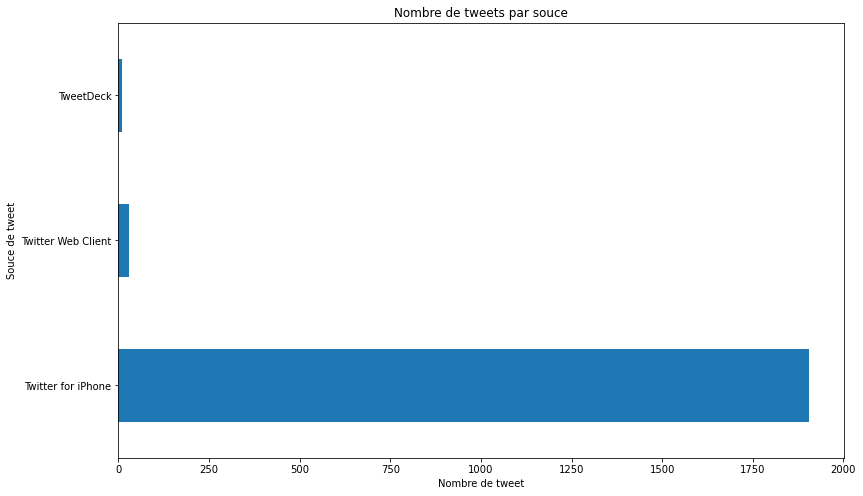

In [93]:
## les sources de publications
y=clean_twitter_archive.source.value_counts().plot(kind='barh',figsize=(13,8))
plt.title('Nombre de tweets par souce')
plt.xlabel('Nombre de tweet')
plt.ylabel('Souce de tweet')


Text(0, 0.5, 'Nombre de likes et de retweet')

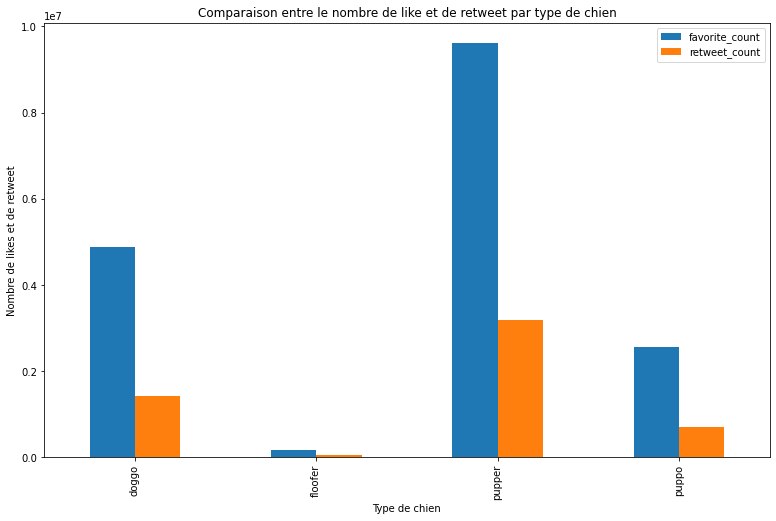

In [94]:
### Nombre de like et de retweet
clean_twitter_archive.groupby('dog_level')[['favorite_count','retweet_count']].sum().plot(kind='bar',figsize=(13,8))
plt.title('Comparaison entre le nombre de like et de retweet par type de chien')
plt.xlabel('Type de chien')
plt.ylabel('Nombre de likes et de retweet')

<AxesSubplot:title={'center':'La part des publications types de races des chiens par etape'}, ylabel='favorite_count'>

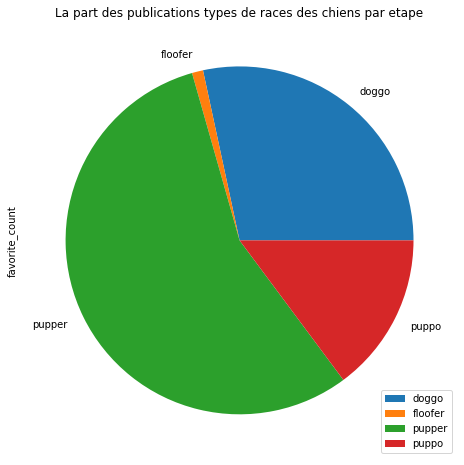

In [95]:
# la part des races de chiens par etape
clean_twitter_archive.groupby('dog_level')['favorite_count'].sum().plot(kind='pie',legend='dog_level',title='La part des publications types de races des chiens par etape',figsize=(13,8))


Text(0.5, 0, 'Nombre de chien')

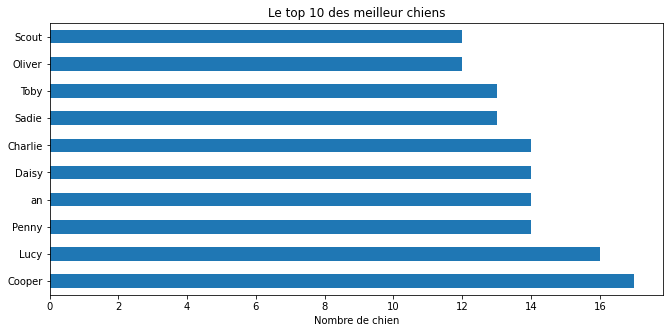

In [96]:
# Les noms qui reviennent plus 
clean_twitter_archive.name.value_counts()[1:11].plot(kind= 'barh', figsize=(11,5), title='Le top 10 des meilleur chiens').set_xlabel("Nombre de chien")


<AxesSubplot:title={'center':'Relation entre le retweet_count et la rating_numerator'}, xlabel='Nombre de retweet', ylabel='Note(rating_numerator)'>

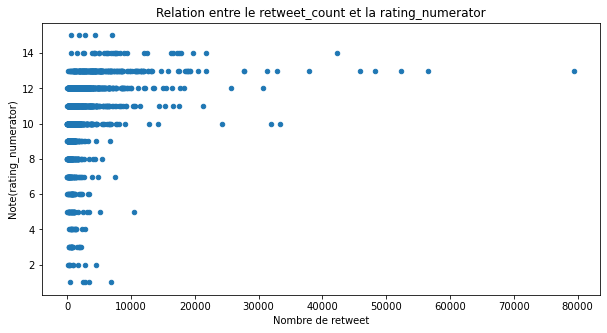

In [97]:

#le lien entre la note et le nombre de retweet
clean_twitter_archive.plot(x='retweet_count',y='rating_numerator',kind='scatter',xlabel='Nombre de retweet',ylabel='Note(rating_numerator)',title='Relation entre le retweet_count et la rating_numerator',figsize=(10,5))


<AxesSubplot:title={'center':'Relation entre le nombre de like et la rating_numerator'}, xlabel='Nombre de likes', ylabel='Note(rating_numerator)'>

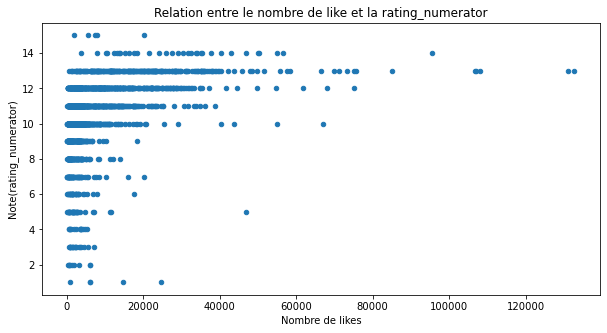

In [98]:
#le lien entre la note et le nombre de retweet
clean_twitter_archive.plot(x='favorite_count',y='rating_numerator',kind='scatter',xlabel='Nombre de likes',ylabel='Note(rating_numerator)',title='Relation entre le nombre de like et la rating_numerator',figsize=(10,5))


Text(0.5, 0, '(Anees , Mois )')

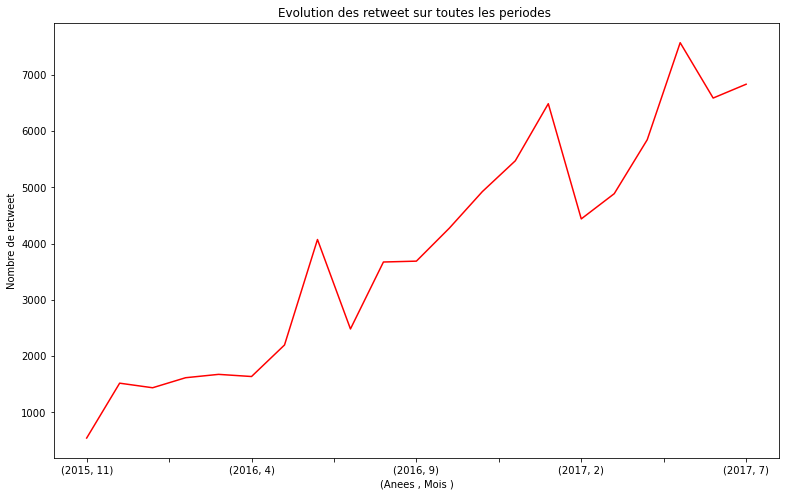

In [99]:
#comparaison entre les retweets et les likes 
clean_twitter_archive.retweet_count.groupby([clean_twitter_archive["timestamp"].dt.year, clean_twitter_archive["timestamp"].dt.month]).mean().plot(kind='line',figsize=(13,8),color="r")
plt.title('Evolution des retweet sur toutes les periodes ')
plt.ylabel('Nombre de retweet')
plt.xlabel('(Anees , Mois )')


Text(0.5, 0, '(Anees , Mois )')

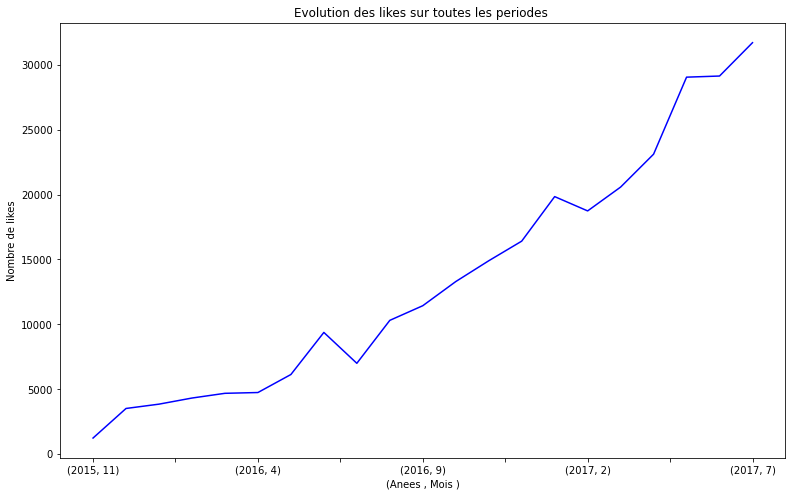

In [100]:
#evolution des likes 
clean_twitter_archive.favorite_count.groupby([clean_twitter_archive["timestamp"].dt.year, clean_twitter_archive["timestamp"].dt.month]).mean().plot(kind='line',figsize=(13,8),color="b")
plt.title('Evolution des likes sur toutes les periodes ')
plt.ylabel('Nombre de likes')
plt.xlabel('(Anees , Mois )')

Text(0, 0.5, 'Nombre de tweets')

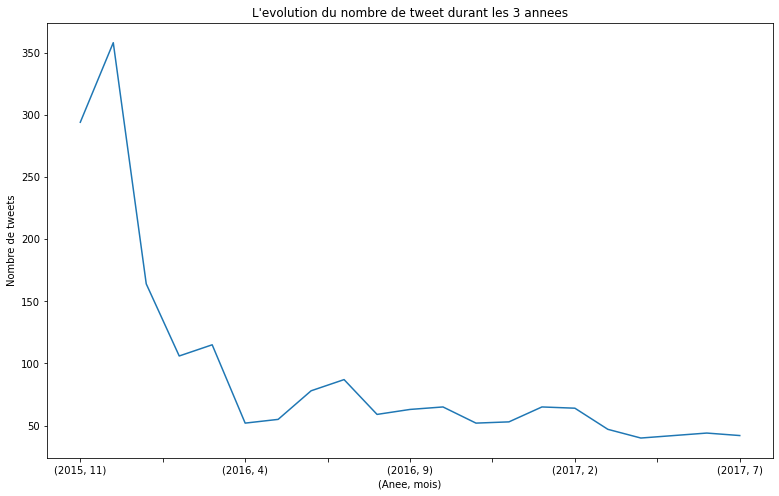

In [101]:
## evolution des posts 
donne = clean_twitter_archive.tweet_id.groupby([clean_twitter_archive["timestamp"].dt.year, clean_twitter_archive["timestamp"].dt.month]).count()
ax = donne.plot( title="L'evolution du nombre de tweet durant les 3 annees",figsize=(13,8))
ax.set_xlabel("(Anee, mois)")
ax.set_ylabel("Nombre de tweets")

## Reference pour certaines partie :
le cours de udacity sur "la preparation des donnees ainsi que des recherches quand j'ai rencotre des difficultes"